# User's Guide: Chapter 9: Chordify

Chordify is a powerful tool for reducing a complex score with multiple parts to a succession of chords in one part that represent everything that is happening in the score.  Take this short chorale by Bach:

In [2]:
# ignore this
%load_ext music21.ipython21

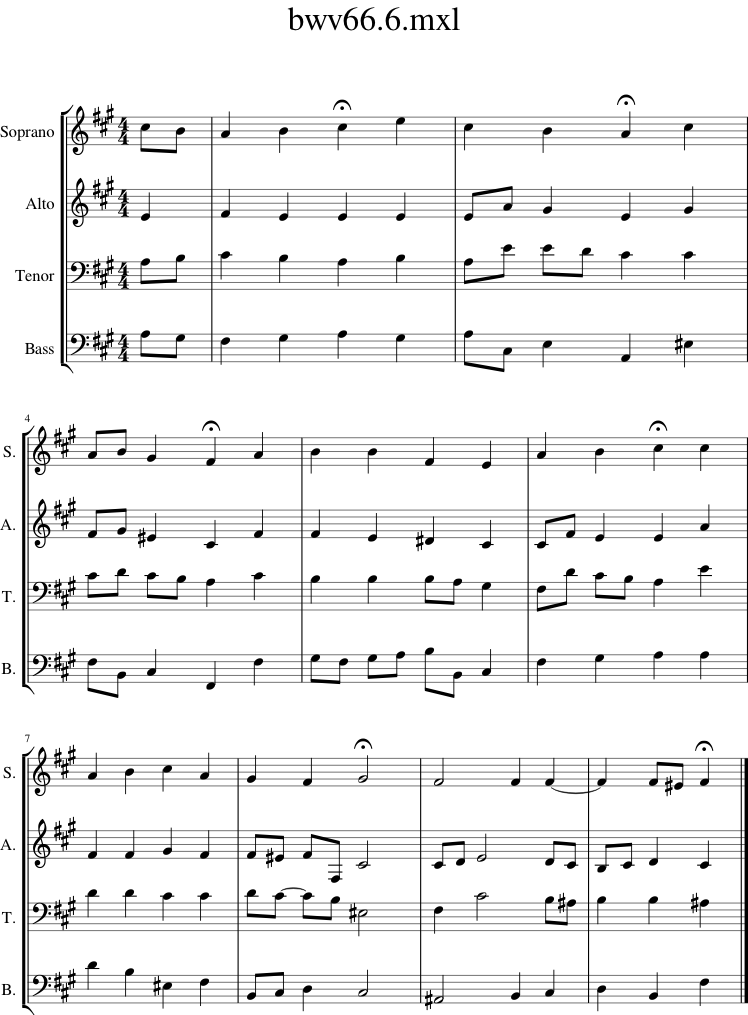

In [3]:
from music21 import *

b = corpus.parse('bwv66.6')
b.show()

Let's take it and chordify it using the :meth:`~music21.stream.Stream.chordify` method.

In [4]:
bChords = b.chordify()

Now we can see if there are any (fully-notated) dominant seventh chords in the piece.  The new chordified part still has measures, so we'll flatten the chordified part first to get to the chords.  It might also have time signatures, etc., so we will filter them out so we only have chords.

In [6]:
for thisChord in bChords.flat:
    if 'Chord' not in thisChord.classes: # not a chord
        continue
    if thisChord.isDominantSeventh():
        print(thisChord.measureNumber, thisChord.beatStr, thisChord)

2 2 1/2 <music21.chord.Chord B4 G#4 D4 E3>
3 2 1/2 <music21.chord.Chord G#4 E#4 B3 C#3>
4 3 1/2 <music21.chord.Chord F#4 D#4 A3 B2>
8 2 <music21.chord.Chord F#4 E4 C#4 A#2>


Sure enough we can check the score above and see that there are four of them: three of them on the offbeat (m.2 beat 2.5, m. 3 beat 2.5, and m. 4 beat 3.5) which are made from passing motion, and one of them in m. 8 beat 2 also in a metrically weak position.

We can see the chordified version by callling ".show()" on ``bChords`` itself, but it's probably better to see it in the context of the whole score.  Let's put it in the score at the beginning (all `Part` objects should go at the beginning) and then show just measures 0 (pickup) to 4:

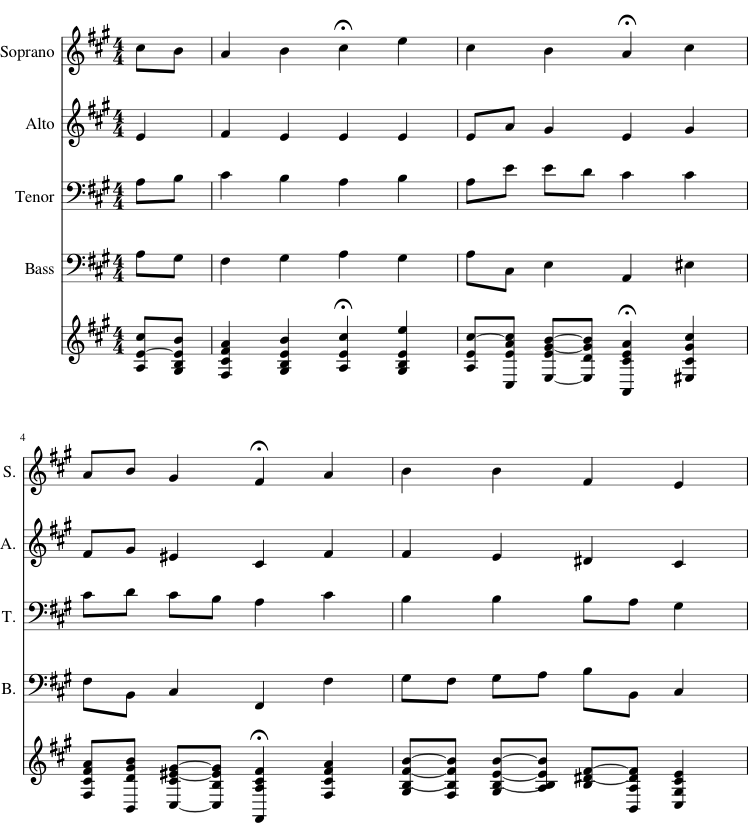

In [7]:
b.insert(0, bChords)
b.measures(0, 4).show()

That's a bit messy to read, so let's put all these chords in ``closedPosition`` (see :ref:`User's Guide, Chapter 7: Chords <usersGuide_07_chords>` for more information).

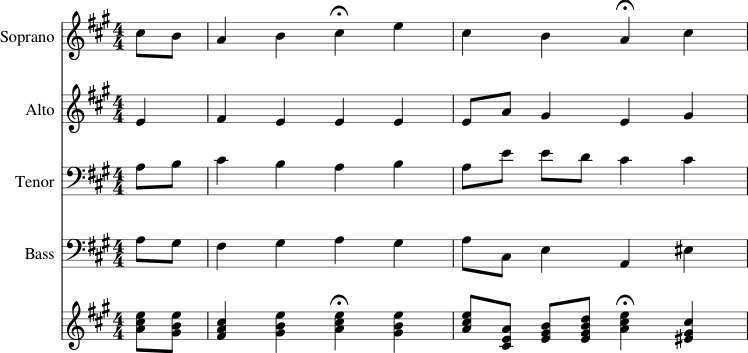

In [8]:
for c in bChords.flat:
    if 'Chord' not in c.classes:
        continue
    c.closedPosition(forceOctave=4, inPlace=True)

b.measures(0,2).show()

We can use the function ``roman.romanNumeralFromChord`` to label each of the chordified Chords:

In [9]:
for c in bChords.flat.getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

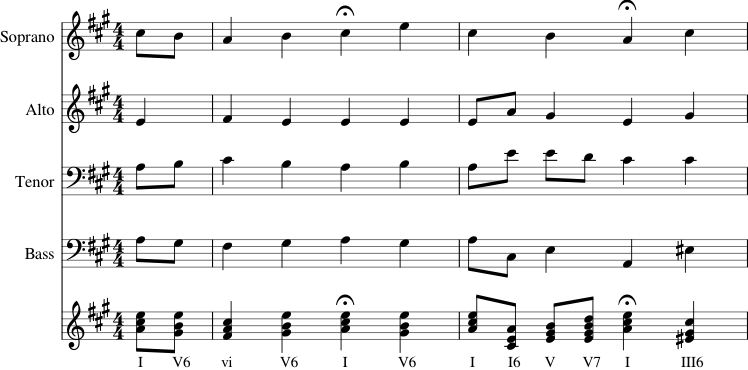

In [10]:
b.measures(0, 2).show()

We can also see everything directly if we look at the ``.show('text')`` output:

In [11]:
bChords.measures(0,2).show('text')

{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.KeySignature of 3 sharps, mode minor>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord G#4 B4 E5>
{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.chord.Chord F#4 A4 C#5>
    {1.0} <music21.chord.Chord G#4 B4 E5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord G#4 B4 E5>
{5.0} <music21.stream.Measure 2 offset=5.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord C#4 E4 A4>
    {1.0} <music21.chord.Chord E4 G#4 B4>
    {1.5} <music21.chord.Chord E4 G#4 B4 D5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord E#4 G#4 C#5>


We can also just extract the lyrics, where we stored the RomanNumeral information: 

In [14]:
for c in bChords.measures(0,2).flat:
    if 'Chord' not in c.classes:
        continue
    print(c.lyric, end=' ')

I V6 vi V6 I V6 I I6 V V7 I III6 

There are more specialized commands for ``.chordify``, so if you want to learn more, look at the :meth:`~music21.stream.Stream.chordify` documentation.  We will get to the option, `addPartNameAsGroup` later, which will let you know exactly where each pitch in the chordified Chord comes from.  But for now, let's jump to :ref:`Chapter 10: File Formats <usersGuide_10_fileFormats1>`